In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

C:\Users\SHIVDAS\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\SHIVDAS\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [56]:
#Question 1

1 - Business Problem


___Prepare rules for the all the data sets 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots

2 - Data collection and description

In [2]:
df=pd.read_csv('book.csv')

In [3]:
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
df1=df.copy()

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [7]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [8]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [9]:
df1.shape

(2000, 11)

In [10]:
item_seta={}

In [11]:
te=TransactionEncoder()

In [12]:
te_ary=te.fit(df1).transform(df1)

In [13]:
ap=pd.DataFrame(te_ary,columns=te.columns_)

<AxesSubplot:title={'center':'Frequent Items'}>

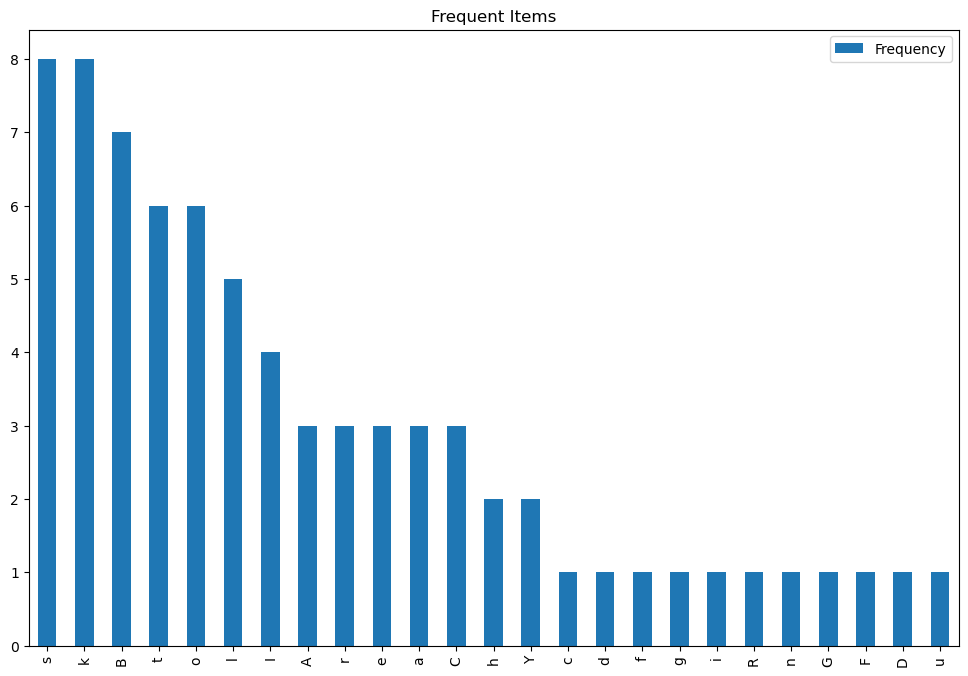

In [14]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',figsize=(12,8),title="Frequent Items")

3 - Apriori algorithm

In [15]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [16]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [17]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [18]:
confs = []

In [19]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

C:\Users\SHIVDAS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\SHIVDAS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\SHIVDAS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\SHIVDAS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool 

In [20]:
all_conf = pd.concat(confs,axis=1)

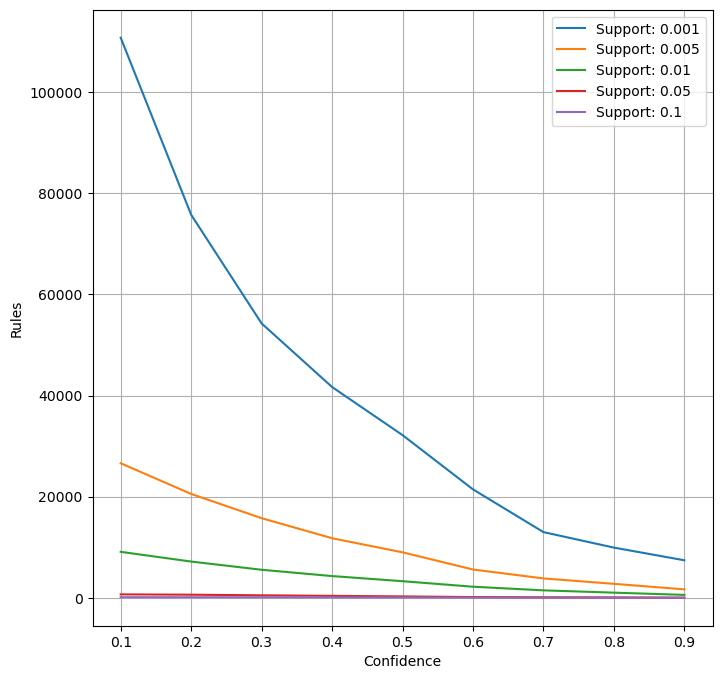

In [21]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

4 - Conclusion

As shown in above graph
1.Lower the Confidence level Higher the no. of rules.
2.Higher the Support, lower the no. of rules.
Lets try with Support 0.01 and Confidence at 0.4

In [22]:
ap_final =  apriori(ap,0.001,True)


In [23]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)


In [24]:
rules_final[rules_final['confidence'] > 0.5]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
5,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(r),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
742,"(B, t)","(k, Y, s, o)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970
743,"(o, t)","(B, k, Y, s)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970
744,"(B, Y)","(k, s, o, t)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
745,"(Y, o)","(k, B, s, t)",0.0010,0.0015,0.001,1.000000,666.666667,0.000999,inf


In [25]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

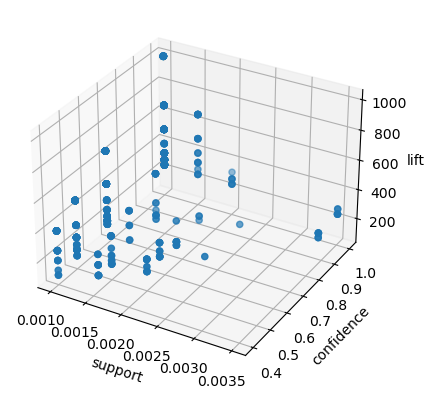

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

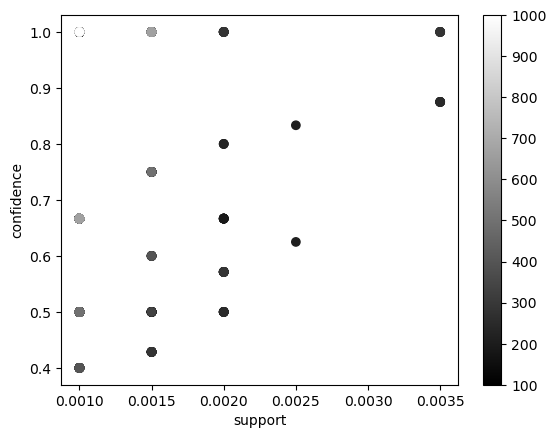

In [27]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [28]:
# Question 2

Prepare rules for the all the data sets 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots

# 2 - Data collection and description

In [30]:
df = pd.read_csv('my_movies.csv')

In [31]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [32]:
df= df.iloc[:,5:]

In [33]:
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [35]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [36]:
df.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [37]:
df.shape

(10, 10)

In [38]:
item_sets = {}

In [39]:
te = TransactionEncoder()

In [40]:
te_ary = te.fit(df).transform(df)

In [41]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

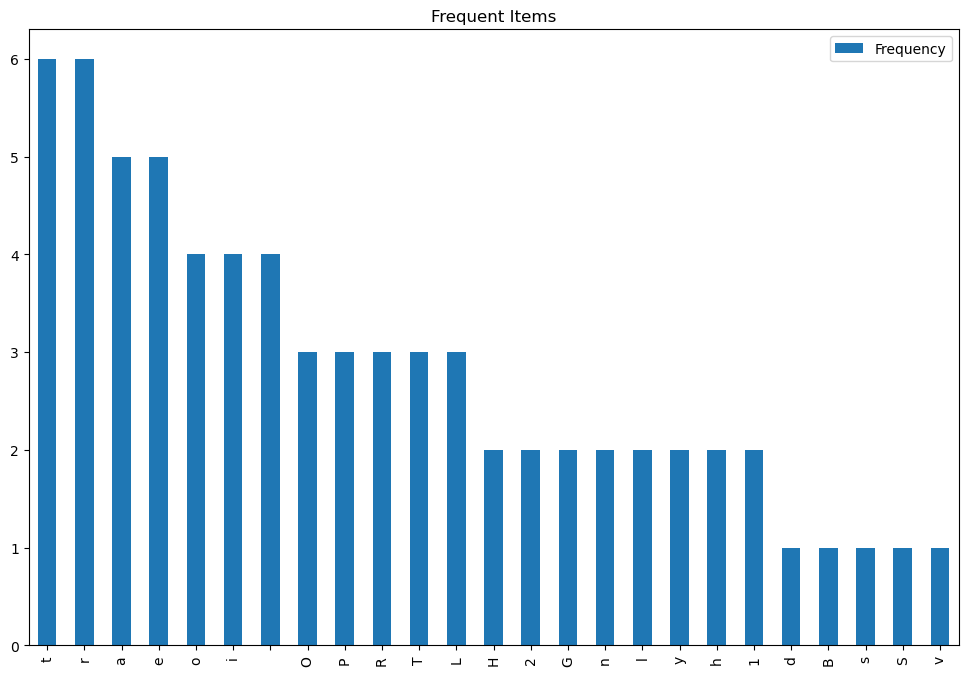

In [42]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

# 3 - Apriori algorithm

In [43]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [44]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [45]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [46]:
confs = []

In [47]:
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

C:\Users\SHIVDAS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\SHIVDAS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\SHIVDAS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\SHIVDAS\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool 

In [48]:
all_conf = pd.concat(confs,axis=1)

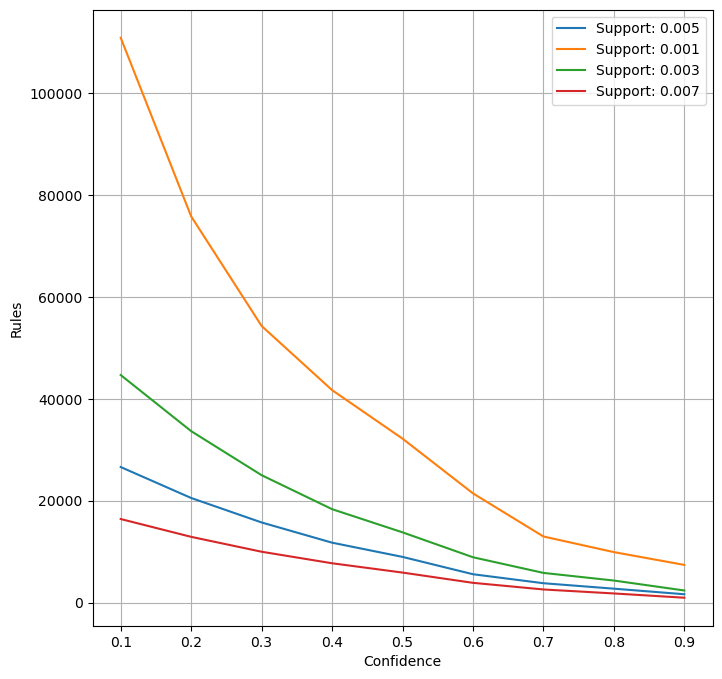

In [49]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# 4 - Conclusion

As shown in above graph

Lower the Confidence level Higher the no. of rules.
Higher the Support, lower the no. of rules.

# Lets try with Support 0.005 and Confidence at 0.4

In [50]:
ap_final =  apriori(ap,0.005,True)

In [51]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [52]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
6,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,(e),( ),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0
...,...,...,...,...,...,...,...,...,...
113719,"(r, 2)","(y, H, t, , o, P, a, e)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113721,"(2, o)","(y, H, t, , r, P, a, e)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113723,"(H, 2)","(y, t, , r, o, P, a, e)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113726,"(2, a)","(y, H, t, , r, o, P, e)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [53]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

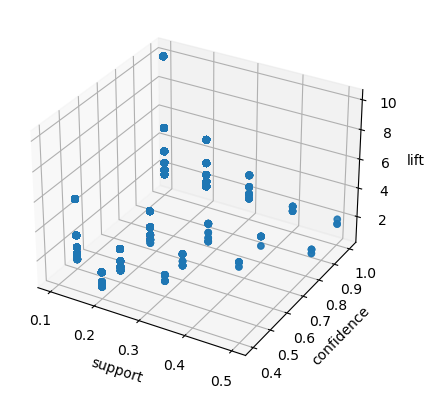

In [54]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

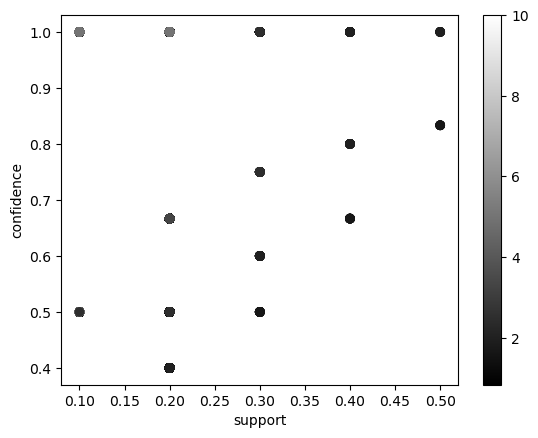

In [55]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")